In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from bnspopkne.kilonovae import Setzer2022_kilonova as saeev
from bnspopkne.kilonovae import Setzer2022_population_parameter_distribution as s22p

In [3]:
test_inst = saeev(
    mass1=1.5,
    mass2=1.5,
)

In [4]:
# List out the parameters of the BNS mergers kilonova and binary inspiral
for i in range(12):
    print(f"{getattr(test_inst, f'param{i+1}_name')}: {getattr(test_inst, f'param{i+1}')}")

mass1: 1.5
mass2: 1.5
compactness1: 0.18709909513866615
compactness2: 0.18709909513866615
viewing_angle: 1.1953308158008182
electron_fraction: 0.19200075773275319
dynamical_ejecta_mass: 0.0031141174707924844
median_ejecta_velocity: 0.25626358545511224
grey_opacity: 17.077069479773833
secular_ejecta_mass: 0.03524759380998809
total_ejecta_mass: 0.03836171128078057
disk_unbinding_efficiency: 0.22202369775846442


Note in current setup creating the population takes quite long, but it works.

In [5]:
test_dist = s22p(population_size=10000, only_draw_parameters=False, chunksize=50)

  0%|                                                         | 0/10000 [00:00<?, ?it/s]WARNING: AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version. [sncosmo]
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
100%|█████████████████████████████████████████████| 10000

<IPython.core.display.Javascript object>


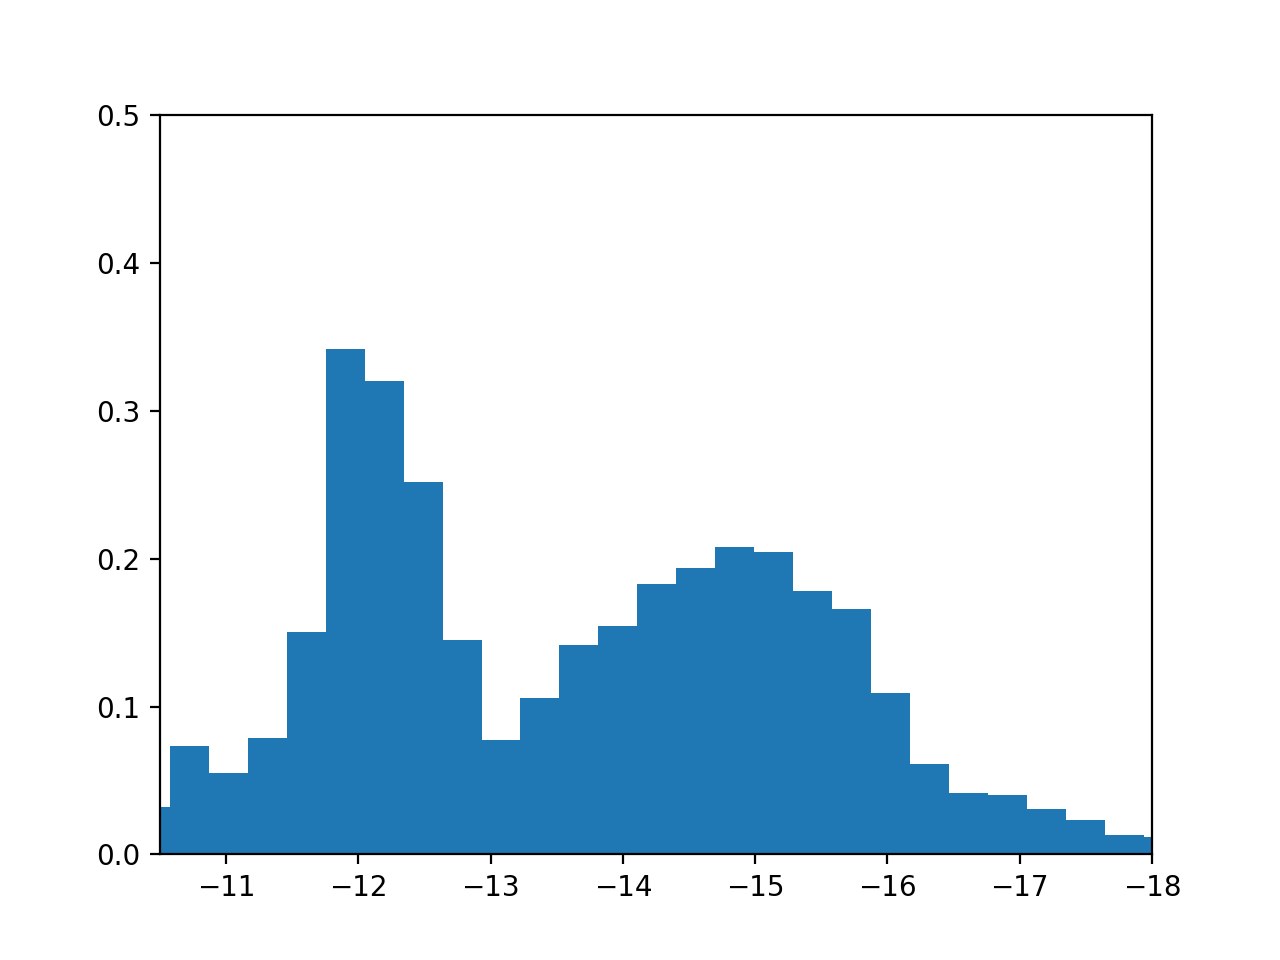

(-10.5, -18.0)

In [8]:
plt.figure()
plt.hist(test_dist.peak_absmag_lssti, bins=30, density=True)
plt.ylim(0,0.5)
plt.xlim(-10.5, -18)

<IPython.core.display.Javascript object>


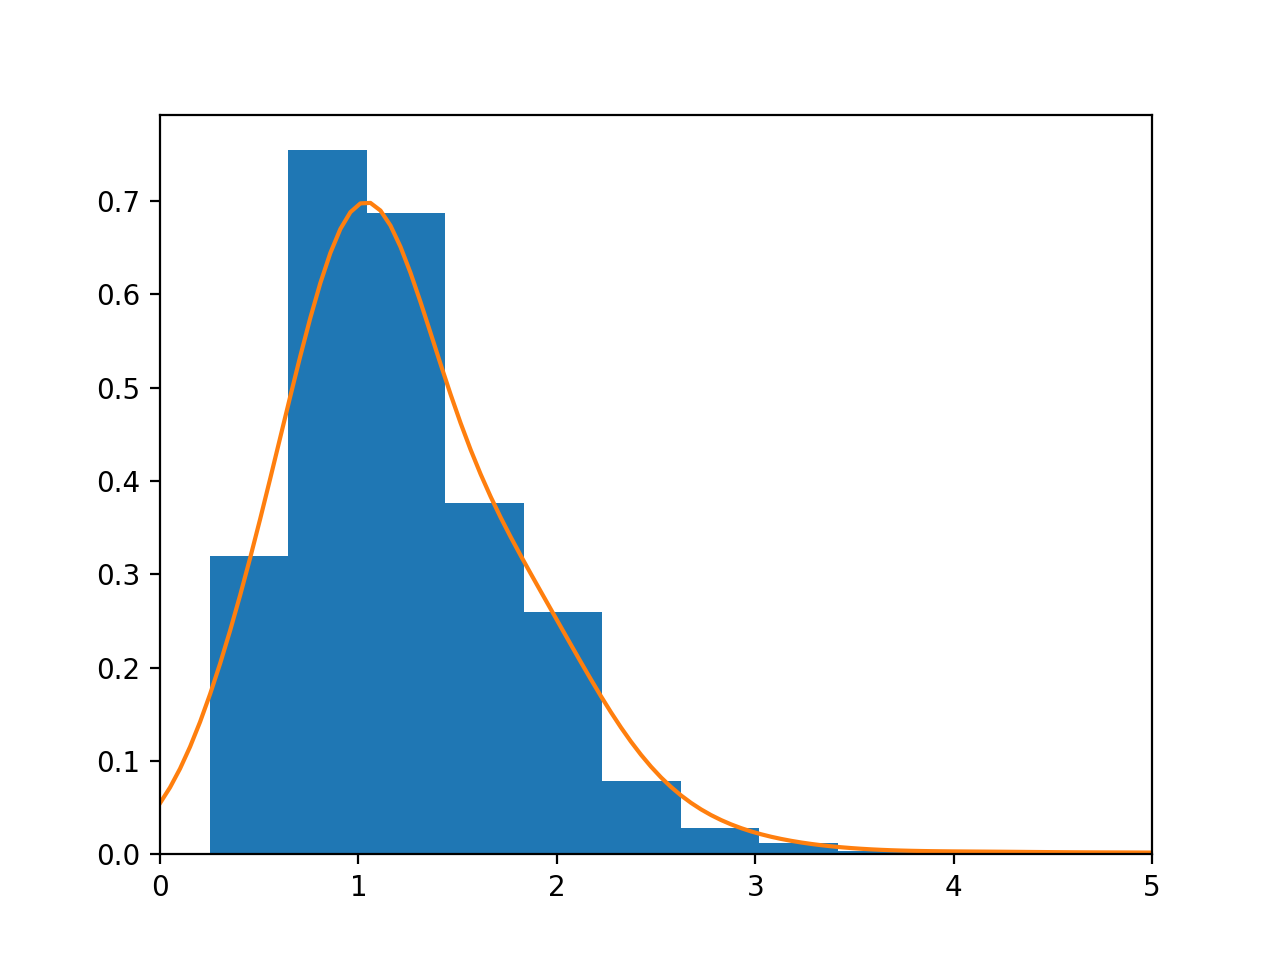

In [40]:
from scipy import stats
import numpy as np
kde = stats.gaussian_kde(test_dist.one_mag_peak_time_lssti)
times = np.linspace(0,5,100)
plt.figure()
plt.hist(test_dist.one_mag_peak_time_lssti, bins=12,range=(0.25,5), density=True)
plt.xlim(0,5)
plt.plot(times, kde(times))

<IPython.core.display.Javascript object>


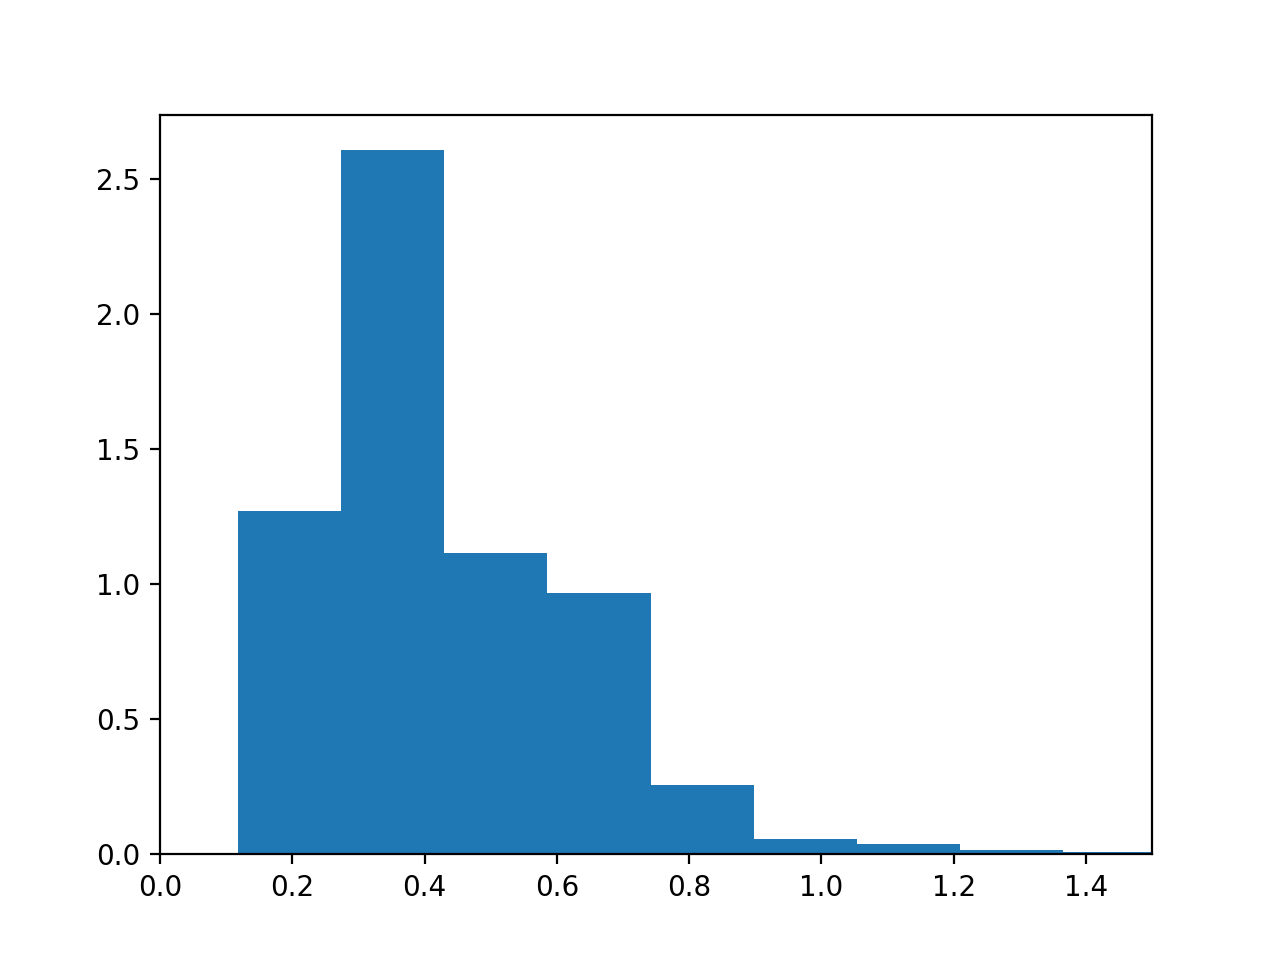

(0.0, 1.5)

In [41]:
plt.figure()
plt.hist(test_dist.peak_time, bins=50, density=True)
plt.xlim(0,1.5)